# Load the Geometry of a Drawn Gene Character for Anylitcal Processing

In [1]:
import os
import xmltodict

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image, ImageDraw
from random import randint, seed
from xmlparse import xmlToGeometry, loadGeometry, loadRef

import numpy as np

2023-09-19T16:49:25.123812Z [INFO ] Stylus initialized - Stylus 1.5.0 [RELEASE - Aug 29 2023 15:40:46] (c) 2006-2009 Biologic Institute


In [2]:
ref_g, ref_l, output_size = loadRef("56DB", "Reference")
print(len(ref_g))
print(ref_g)

5
[array([[  0., 390.],
       [  0.,   0.]]), array([[  0., 390.],
       [370., 390.],
       [370.,   0.]]), array([[130.     , 390.     ],
       [130.34375, 340.21875],
       [127.375  , 295.375  ],
       [121.09375, 255.46875],
       [111.5    , 220.5    ],
       [ 98.59375, 190.46875],
       [ 82.375  , 165.375  ],
       [ 62.84375, 145.21875],
       [ 40.     , 130.     ]]), array([[240.   , 390.   ],
       [240.   , 210.   ],
       [240.625, 188.125],
       [247.5  , 172.5  ],
       [260.625, 163.125],
       [280.   , 160.   ],
       [320.   , 160.   ],
       [320.   , 210.   ]]), array([[  0.,  50.],
       [370.,  50.]])]


In [3]:
g, l = loadGeometry("Genes/maint_0.001 on 56DB.08", "56DB", output_size, f_read = ["56DB.08.92.gene"])[0]
print(len(g))
print(g)

7
[array([[139.45994049,  52.19472431],
       [114.94905929,  98.8562059 ],
       [100.08245835, 127.15782512],
       [ 79.05790967, 127.15782512]]), array([[ 93.92451061, 155.45944434],
       [151.07515924, 155.45944434],
       [185.73877985, 155.45944434],
       [210.24966105, 108.79796274],
       [210.24966105,   0.        ]]), array([[187.76263304,   0.        ],
       [212.27351423,  46.6614816 ],
       [187.76263304,  93.32296319],
       [187.76263304, 133.34749693]]), array([[169.98946655,  18.35986238],
       [135.32584593,  18.35986238],
       [ 78.17519731,  18.35986238],
       [ 21.02454868,  18.35986238],
       [  0.        ,  18.35986238]]), array([[ 49.53022156,  46.6614816 ],
       [ 25.01934036,  93.32296319],
       [ 10.15273942, 121.62458241],
       [ 34.66362062, 168.28606401]]), array([[106.38896823, 120.65662627],
       [127.41351691, 120.65662627],
       [127.41351691,  80.63209254],
       [162.07713752,  80.63209254],
       [176.94373846,  52

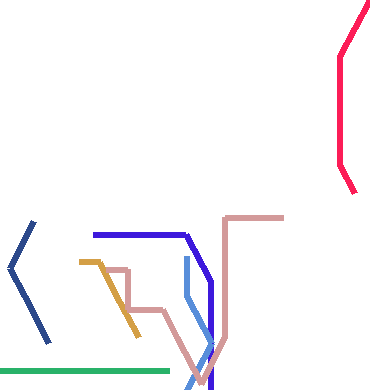

In [4]:
alignments=[1, 2, 0, 4, 3]
img = Image.new(mode="RGBA", size=output_size)
seed(742)
colors = [(randint(0, 256), randint(0, 256), randint(0, 256)) for _ in range(len(g)+1)]
colors_t = [(c[0], c[1], c[2], 70) for c in colors]

for i in range(len(g)):
    draw = ImageDraw.Draw(img)
    for a in range(len(g[i])-1):
        x1, y1 = g[i][a]
        x2, y2 = g[i][a+1]
        y1 = -(y1-output_size[1]/2)+output_size[1]/2
        y2 = -(y2-output_size[1]/2)+output_size[1]/2
        draw.line(((x1, y1), (x2, y2)), width=6, fill=colors[i])

display(img)
img.save("extra_strokes.png")
# I think I ran into these before in a different form - these stray strokes are giving us major scaling issues!

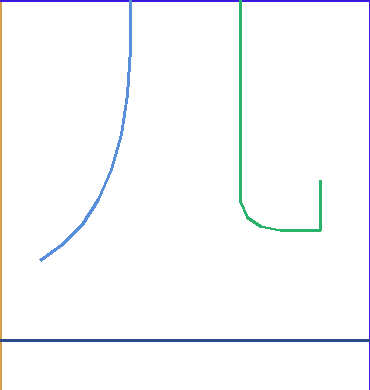

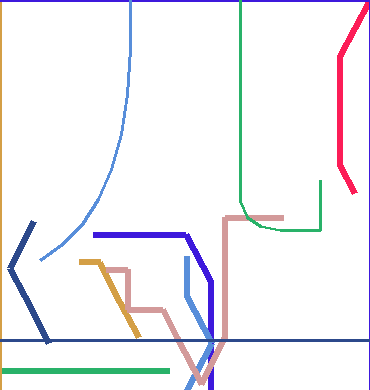

In [5]:
img_full = Image.new(mode="RGBA", size=output_size)

for i in range(len(alignments)):
    draw_full = ImageDraw.Draw(img_full)
    draw_over = ImageDraw.Draw(img)
    for a in range(len(ref_g[i])-1):
        x1, y1 = ref_g[i][a]
        x2, y2 = ref_g[i][a+1]
        y1 = -(y1-output_size[1]/2)+output_size[1]/2
        y2 = -(y2-output_size[1]/2)+output_size[1]/2
        draw_full.line(((x1, y1), (x2, y2)), width=3, fill=colors[i])
        draw_over.line(((x1, y1), (x2, y2)), width=3, fill=colors[i])

img_full.save("56DB_ref.png")
img.save("56DB_both.png")

display(img_full)
display(img)
# These colors have no meaning - we aren't taking alignment into consideration
# This does, however, show what's going on with the data we're rendering
# All the colors in the thick lines not in common with the reference figure are all extraneous
# Problem is, we can't figure out which strokes are 'stray' until at least matching
# Our matching algorithm may need to take a different approach to scaling...